In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math 

c:\Users\lc100\AppData\Local\miniconda3\envs\frameSubtraction\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lc100\AppData\Local\miniconda3\envs\frameSubtraction\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\lc100\AppData\Local\miniconda3\envs\frameSubtraction\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
def middle(box):
    """_summary_

    Args:
        box (array): box

    Returns:
        int: middle of the box
    """
    return [box[0]+(box[2]//2),box[1]+(box[3]//2)]

######################################################################################################

def decomp_row(row,size):
    """ decomposition of a row for the wavelet transform

    Args:
        row (array): row
        size (int): biggest power of 2 that contain the frame

    Returns:
        array: row decomposed
    """
    row=row/math.sqrt(2)
    while size>1:
        size=size//2
        for i in range(size):
            A=row[2*i]
            B=row[2*i+1]
            row[i],row[size+i]=(A+B)/math.sqrt(2),(A-B)/math.sqrt(2)
    return row
                       
######################################################################################################

def decomp_2D(img,size):
    """ decomp all the rows of a 2D array
    Args:
        img (array): 2D frame
        size (int): biggest power of 2 that contain the frame

    Returns:
        array: img decomposed
    """
    for i in range(size):
        img[i,:]=decomp_row(img[i,:],i)
    return img
        
######################################################################################################

def decomp_RGB(img,size):
    """ decomp of a RGB array

    Args:
        img (array): RGB array
        size (int): biggest power of 2 that contain the frame

    Returns:
        array: img decomposed
    """
    for i in range(3):
        img[:,:,i]=np.transpose(decomp_2D(img[:,:,i],size))
        img[:,:,i]=np.transpose(decomp_2D(img[:,:,i],size))
    return img

######################################################################################################

def Wavelet(img):
    """ wavelet Haar transform of a RGB frame

    Args:
        img (array): RGB frame

    Returns:
        array: wavelet transform
    """
    img= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    
    n=min(img.shape[0],img.shape[1])
    
    size = 1
    while size < n: size *=2
    size//=2
    
    middle_x=img.shape[0]//2
    middle_y=img.shape[1]//2
    
    resized=img[middle_x-(size//2):middle_x+(size//2),middle_y-(size//2):middle_y+(size//2),:]
    #resized = cv2.resize(img,(64,64))
    
    res=decomp_RGB(resized,size)
    
    return res



very blurry
(32, 32, 3)
(64, 64, 3)


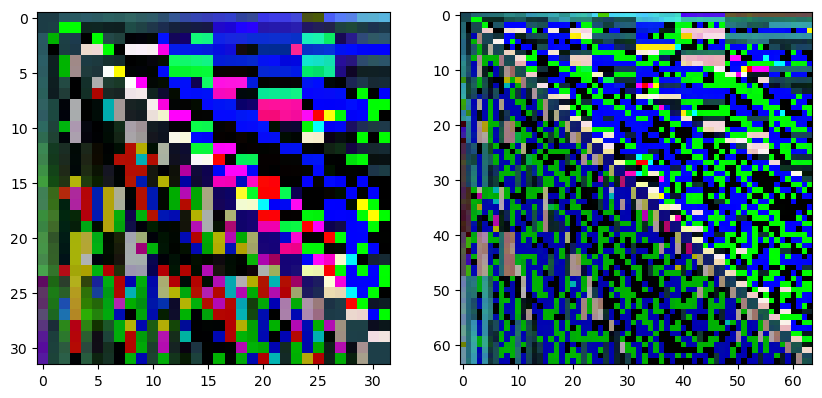

28
28
29
28
---------------------------------------------------------------------------------------------
[[[28 60 69]
  [29 60 69]]

 [[28 60 69]
  [28 63 69]]] 
------
 [[[25 70 84]
  [25 69 86]]

 [[25 74 79]
  [25 73 81]]]

------
 18.666666666666668
---------------------------------------------------------------------------------------------


In [7]:
def compare(file1,file2):
    #fig = plt.figure(figsize=(10, 7))

    #template_test = cv2.imread('template/templateRGB_Black.png')
    template_test = cv2.imread(file1)
    waveletT=Wavelet(template_test)
    print(waveletT.shape)
    #fig.add_subplot(1,2,1)
    #plt.imshow(waveletT)


    #template_test = cv2.imread('template/templateGoal.png')
    template_test = cv2.imread(file2)
    wavelet=Wavelet(template_test)
    print(wavelet.shape)
    #fig.add_subplot(1,2,2)
    #plt.imshow(wavelet)

    plt.show()
    
    print(waveletT[0,0,0])
    print(waveletT[1,0,0])
    print(waveletT[0,1,0])
    print(waveletT[1,1,0])
    
    print("---------------------------------------------------------------------------------------------")

    print(waveletT[:2,:2,:],"\n------\n",wavelet[:2,:2,:])
    print("\n------\n",np.sum(cv2.absdiff(waveletT[:2,:2,:2],wavelet[:2,:2,:2]))/3)
    print("---------------------------------------------------------------------------------------------")

print("\nvery blurry")
compare('template/templateRGB_both.png','image.png')